In [1]:
import tensorflow as tf
from tensorflow.keras.utils import img_to_array, array_to_img, load_img, plot_model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
angry_img_path = 'dataset/Angry/'
happy_img_path = 'dataset/Happy/'
sad_img_path = 'dataset/Sad/'
neutral_img_path = 'dataset/Neutral/'

In [3]:
angry_file_list = os.listdir(angry_img_path)
happy_file_list = os.listdir(happy_img_path)
sad_file_list = os.listdir(sad_img_path)
neutral_file_list = os.listdir(neutral_img_path)

In [4]:
angry_file_len = len(angry_file_list)
happy_file_len = len(happy_file_list)
sad_file_len = len(sad_file_list)
neutral_file_len = len(neutral_file_list)

total_len = angry_file_len + happy_file_len + sad_file_len + neutral_file_len

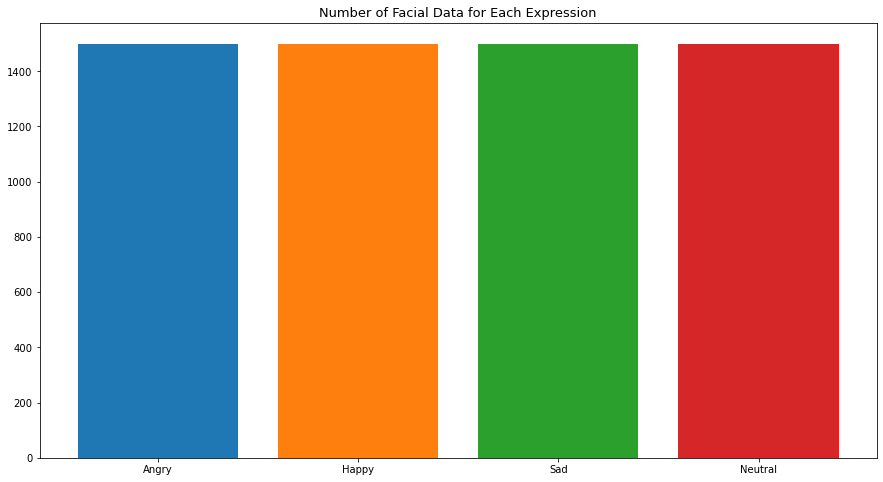

In [5]:
plt.figure(figsize=(15, 8))
plt.bar(x='Angry', height=angry_file_len)
plt.bar(x='Happy', height=happy_file_len)
plt.bar(x='Sad', height=sad_file_len)
plt.bar(x='Neutral', height=neutral_file_len)
plt.title('Number of Facial Data for Each Expression', fontsize=13)
plt.show()

In [6]:
num = 0
all_img = np.float32(np.zeros((total_len, 100, 100, 3)))
all_label = np.float32(np.zeros((total_len, 1)))

In [7]:
for img_name in tqdm(angry_file_list):
    img_path = angry_img_path + img_name
    #img = load_img(img_path, color_mode='grayscale', target_size=(100, 100))
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (100, 100))
    #sobel_x = cv2.Sobel(img, -1, 1, 0, delta=90)
    #sobel_y = cv2.Sobel(img, -1, 0, 1, delta=90)
    #sobel_x = cv2.convertScaleAbs(sobel_x)
    #sobel_y = cv2.convertScaleAbs(sobel_y)
    #img = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)
    #img = cv2.Laplacian(img, -1, ksize=3)
    #img = cv2.Canny(img, 50, 150)
    scharr_x = cv2.Scharr(img, -1, 1, 0, delta=90)
    scharr_y = cv2.Scharr(img, -1, 0, 1, delta=90)
    scharr_x = cv2.convertScaleAbs(scharr_x)
    scharr_y = cv2.convertScaleAbs(scharr_y)
    img = cv2.addWeighted(scharr_x, 0.5, scharr_y, 0.5, 0)

    x = img_to_array(img)
    #x = np.expand_dims(x, axis=0)
    #x = preprocess_input(x)
    all_img[num, :, :] = x

    #all_label[num][0] = 1  # [1, 0, 0, 0]
    all_label[num] = 0
    num += 1

for img_name in tqdm(happy_file_list):
    img_path = happy_img_path + img_name
    #img = load_img(img_path, color_mode='grayscale', target_size=(100, 100))
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (100, 100))
    #sobel_x = cv2.Sobel(img, -1, 1, 0, delta=90)
    #sobel_y = cv2.Sobel(img, -1, 0, 1, delta=90)
    #sobel_x = cv2.convertScaleAbs(sobel_x)
    #sobel_y = cv2.convertScaleAbs(sobel_y)
    #img = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)
    #img = cv2.Laplacian(img, -1, ksize=3)
    #img = cv2.Canny(img, 50, 150)
    scharr_x = cv2.Scharr(img, -1, 1, 0, delta=90)
    scharr_y = cv2.Scharr(img, -1, 0, 1, delta=90)
    scharr_x = cv2.convertScaleAbs(scharr_x)
    scharr_y = cv2.convertScaleAbs(scharr_y)
    img = cv2.addWeighted(scharr_x, 0.5, scharr_y, 0.5, 0)

    x = img_to_array(img)
    #x = np.expand_dims(x, axis=0)
    #x = preprocess_input(x)
    all_img[num, :, :] = x
    all_label[num] = 1
    num += 1

for img_name in tqdm(sad_file_list):
    img_path = sad_img_path + img_name
    #img = load_img(img_path, color_mode='grayscale', target_size=(100, 100))
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (100, 100))
    #sobel_x = cv2.Sobel(img, -1, 1, 0, delta=90)
    #sobel_y = cv2.Sobel(img, -1, 0, 1, delta=90)
    #sobel_x = cv2.convertScaleAbs(sobel_x)
    #sobel_y = cv2.convertScaleAbs(sobel_y)
    #img = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)
    #img = cv2.Laplacian(img, -1, ksize=3)
    #img = cv2.Canny(img, 50, 150)
    scharr_x = cv2.Scharr(img, -1, 1, 0, delta=90)
    scharr_y = cv2.Scharr(img, -1, 0, 1, delta=90)
    scharr_x = cv2.convertScaleAbs(scharr_x)
    scharr_y = cv2.convertScaleAbs(scharr_y)
    img = cv2.addWeighted(scharr_x, 0.5, scharr_y, 0.5, 0)
    
    x = img_to_array(img)
    #x = np.expand_dims(x, axis=0)
    #x = preprocess_input(x)
    all_img[num, :, :] = x
    all_label[num] = 2
    num += 1
    
for img_name in tqdm(neutral_file_list):
    img_path = neutral_img_path + img_name
    #img = load_img(img_path, color_mode='grayscale', target_size=(100, 100))
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (100, 100))
    sobel_x = cv2.Sobel(img, -1, 1, 0, delta=90)
    sobel_y = cv2.Sobel(img, -1, 0, 1, delta=90)
    sobel_x = cv2.convertScaleAbs(sobel_x)
    sobel_y = cv2.convertScaleAbs(sobel_y)
    img = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)
    #img = cv2.Laplacian(img, -1, ksize=3)
    #img = cv2.Canny(img, 50, 150)
    #scharr_x = cv2.Scharr(img, -1, 1, 0, delta=90)
    #scharr_y = cv2.Scharr(img, -1, 0, 1, delta=90)
    #scharr_x = cv2.convertScaleAbs(scharr_x)
    #scharr_y = cv2.convertScaleAbs(scharr_y)
    #img = cv2.addWeighted(scharr_x, 0.5, scharr_y, 0.5, 0)

    x = img_to_array(img)
    #x = np.expand_dims(x, axis=0)
    #x = preprocess_input(x)
    all_img[num, :, :] = x
    all_label[num] = 3
    num += 1

100%|██████████| 1500/1500 [00:13<00:00, 113.82it/s]


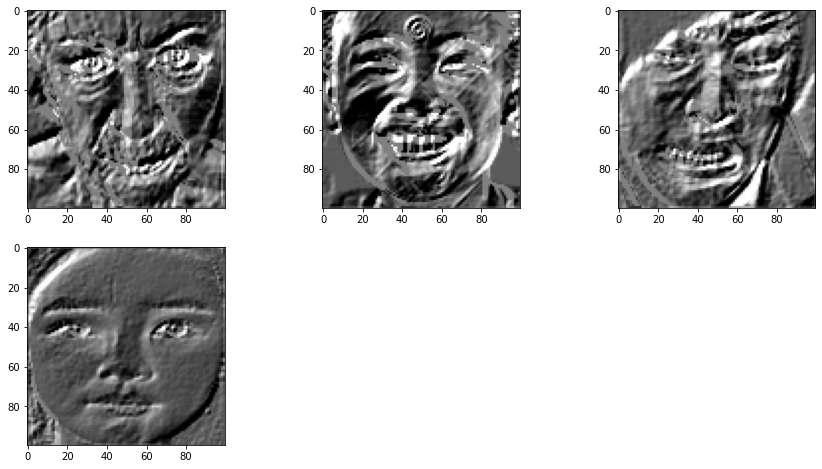

In [8]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.imshow(array_to_img(all_img[1000]), cmap='gray')

plt.subplot(2, 3, 2)
plt.imshow(array_to_img(all_img[2000]), cmap='gray')

plt.subplot(2, 3, 3)
plt.imshow(array_to_img(all_img[3500]), cmap='gray')

plt.subplot(2, 3, 4)
plt.imshow(array_to_img(all_img[5500]), cmap='gray')
plt.show()

In [9]:
all_img = all_img / 255.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    all_img, all_label, test_size= 0.2, stratify=all_label, random_state=0
)

In [11]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, stratify=y_train, random_state=0
)

In [12]:
def resnet():
    resnet = ResNet50(include_top=False, weights=None, input_shape=(100, 100, 3))
    resnet.trainable = False
    model=Sequential()
    model.add(resnet)
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(4096))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    plot_model(model, to_file='resnet_model.png', show_shapes=True)
    return model

In [16]:
def vgg():
    vgg = VGG16(include_top=False, weights=None, input_shape=(100, 100, 3))
    vgg.trainable = False
    model=Sequential()
    model.add(vgg)
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(4096))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    plot_model(model, to_file='vgg_model.png', show_shapes=True)
    return model

In [15]:
model = resnet()

loss_func = tf.keras.losses.SparseCategoricalCrossentropy()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='train_acc')

val_loss = tf.keras.metrics.Mean(name='val_loss')
val_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='val_acc')

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

In [17]:
def get_batches(x, y, batch_size=128):
    for i in range(int(x.shape[0] // batch_size)):
        x_batch = x[i * batch_size : (i + 1) * batch_size]
        y_batch = y[i * batch_size : (i + 1) * batch_size]
        yield(np.asarray(x_batch), np.asarray(y_batch))

@tf.function
def train_step(data, labels):
    with tf.GradientTape() as tape:
        pred = model(data, training=True)
        loss = loss_func(labels, pred)
        gradients = tape.gradient(loss, model.trainable_variables)

        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        train_loss(loss)
        train_acc(labels, pred)
def val_step(data, labels):
    pred = model(data, training=False)
    loss = loss_func(labels, pred)

    val_loss(loss)
    val_acc(labels, pred)

In [18]:
train_loss.reset_states()
train_acc.reset_states()
val_loss.reset_states()
val_acc.reset_states()

for epoch in range(500):
    for datas, labels in get_batches(x_train, y_train):
        train_step(datas, labels)
    for datas, labels in get_batches(x_val, y_val):
        val_step(datas, labels)
    metrics_template='epoch:{}, loss:{:.4f}, acc:{:.2f}%, val_loss:{:.4f}, val_acc:{:.2f}%'
    print(metrics_template.format(epoch+1, train_loss.result(), train_acc.result() * 100, val_loss.result(), val_acc.result() * 100))
        

2022-03-29 09:28:28.190644: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8204
2022-03-29 09:28:29.927166: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


epoch:1, loss:0.7433, acc:65.15%, val_loss:1.4022, val_acc:41.15%
epoch:2, loss:0.6329, acc:71.65%, val_loss:1.3653, val_acc:36.07%
epoch:3, loss:0.5694, acc:74.87%, val_loss:1.3405, val_acc:33.25%
epoch:4, loss:0.5257, acc:77.05%, val_loss:1.3131, val_acc:33.46%
epoch:5, loss:0.4950, acc:78.61%, val_loss:1.2774, val_acc:35.16%
epoch:6, loss:0.4679, acc:79.93%, val_loss:1.2298, val_acc:40.67%
epoch:7, loss:0.4440, acc:81.03%, val_loss:1.1814, val_acc:44.12%
epoch:8, loss:0.4228, acc:82.05%, val_loss:1.1257, val_acc:48.11%
epoch:9, loss:0.4054, acc:82.86%, val_loss:1.0751, val_acc:51.56%
epoch:10, loss:0.3899, acc:83.61%, val_loss:1.0294, val_acc:53.91%
epoch:11, loss:0.3773, acc:84.15%, val_loss:0.9883, val_acc:56.16%
epoch:12, loss:0.3642, acc:84.77%, val_loss:0.9455, val_acc:58.09%
epoch:13, loss:0.3528, acc:85.25%, val_loss:0.9054, val_acc:60.04%
epoch:14, loss:0.3422, acc:85.70%, val_loss:0.8696, val_acc:61.66%
epoch:15, loss:0.3320, acc:86.16%, val_loss:0.8504, val_acc:62.99%
epoc

KeyboardInterrupt: 

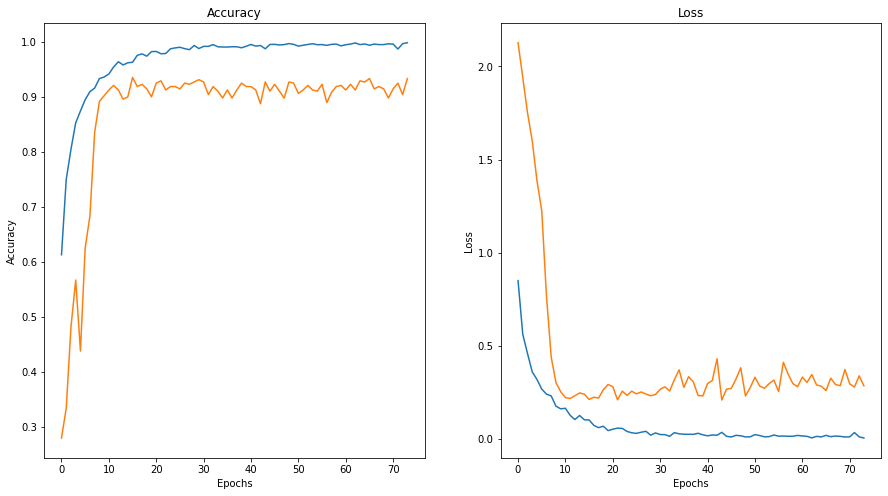

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.subplot(1, 2, 2)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.show()

In [18]:
pred = vgg_model.predict(test_input)
pred = np.argmax(pred, axis=1)

In [19]:
print(classification_report(test_target, pred))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       300
         1.0       0.95      0.93      0.94       300
         2.0       0.89      0.88      0.89       300
         3.0       1.00      1.00      1.00       300

    accuracy                           0.92      1200
   macro avg       0.92      0.92      0.92      1200
weighted avg       0.92      0.92      0.92      1200



In [20]:
print(accuracy_score(test_target, pred))

0.9241666666666667


In [21]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(test_label, pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.GnBu):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(test_label, pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(15,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Confusion matrix, without normalization


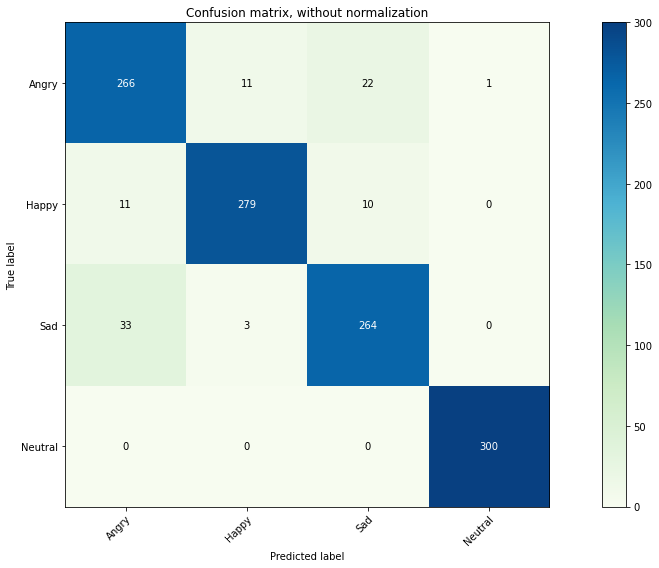

In [22]:
label = ['Angry', 'Happy', 'Sad', 'Neutral']

plot_confusion_matrix(test_target, pred, classes = label, title='Confusion matrix, without normalization')
plt.show()

Normalized confusion matrix


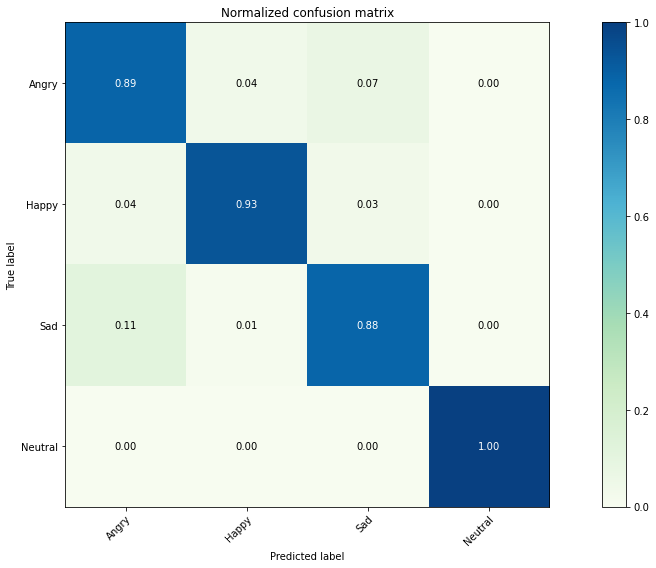

In [23]:
plot_confusion_matrix(test_target, pred, classes = label, normalize = True, title = 'Normalized confusion matrix')
plt.show()

###### 